In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.imports import *

In [3]:
PATH = '/home/paperspace/data/materialist/'
sz=224
arch=resnext101_64
#arch=resnet34
bs=16

In [4]:
label_csv = f'{PATH}labels_2.csv'
label_df = pd.read_csv(label_csv)

In [5]:
n = len(list(open(label_csv))) -1 
val_idxs = get_cv_idxs(n, val_pct=.21)

In [6]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, f'{PATH}merged/train', f'{PATH}labels_2.csv', test_name='test', 
                                    val_idxs=val_idxs, 
                                    tfms=tfms, 
                                    bs=bs)

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=.5)

In [8]:
learn.load('materialist_10164_1')

In [ ]:
lrf=learn.lr_find()
learn.sched.plot()

In [ ]:
lr = 5e-3
learn.precompute = True
learn.fit(lr, 2, cycle_len=1)

In [ ]:
learn.save('materialist_10164_1')

In [8]:
learn.precompute = False

In [10]:
lr = 5e-3
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.052435   0.787254   0.767954  
    1      1.106744   0.782038   0.769421                      
    2      1.031658   0.769258   0.77294                       



[0.769258, 0.7729402834104623]

In [10]:
learn.load('materialist_10164_precompute_false')

In [11]:
learn.unfreeze()

In [ ]:
lrf=learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))









  0%|          | 13/9292 [00:09<1:54:41,  1.35it/s, loss=1.45]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 65%|██████▌   | 6086/9292 [1:12:57<38:26,  1.39it/s, loss=3.58] 

In [10]:
lr=np.array([1e-5,1e-4,1e-3])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.974089   0.711971   0.789259  
    1      0.883569   0.70203    0.791336                      
    2      0.806186   0.697723   0.793033                      
    3      0.85675    0.694025   0.793487                      
    4      0.816611   0.687262   0.794551                      
    5      0.908852   0.687602   0.794754                      
    6      0.858887   0.68823    0.793666                      



[0.68822986, 0.7936656545289615]

In [11]:
learn.save('materials_10164_unfrozen_1')

In [15]:
def get_data(sz):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, f'{PATH}merged/train', f'{PATH}labels_2.csv', test_name='test', 
                                    val_idxs=val_idxs, 
                                    tfms=tfms, 
                                    bs=bs)

In [16]:
learn.set_data(get_data(500))

In [17]:
learn.freeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 68%|██████▊   | 6329/9292 [1:56:33<54:34,  1.10s/it, loss=3.57]   

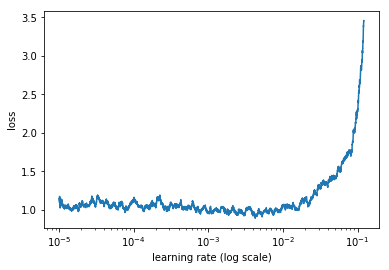

In [18]:
lrf=learn.lr_find()
learn.sched.plot()

In [19]:
lr=1e-2

In [20]:
learn.fit(lr, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/9292 [00:00<?, ?it/s]                        







  0%|          | 3/9292 [00:05<4:25:29,  1.71s/it, loss=0.983]


Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



  3%|▎         | 237/9292 [04:21<2:46:17,  1.10s/it, loss=1.12]

Process Process-128:
Process Process-123:
Process Process-126:
Process Process-127:
Process Process-122:
Process Process-124:
Process Process-121:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python


Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-73017c7e0d99>", line 1, in <module>
    learn.fit(lr, 1, cycle_len=1)
  File "/home/paperspace/fastai/courses/dl1/fastai/learner.py", line 214, in fit
    return self.fit_gen(self.model, self.data, layer_opt, n_cycle, **kwargs)
  File "/home/paperspace/fastai/courses/dl1/fastai/learner.py", line 161, in fit_gen
    metrics=metrics, callbacks=callbacks, reg_fn=self.reg_fn, clip=self.clip, **kwargs)
  File "/home/paperspace/fastai/courses/dl1/fastai/model.py", line 96, in fit
    loss = stepper.step(V(x),V(y), epoch)
  File "/home/paperspace/fastai/courses/dl1/fastai/model.py", line 40, in step
    output = self.m(*xs)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/module.py", line 357, in __call__


KeyboardInterrupt: 

Process Process-125:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paperspace/fastai/courses/dl1/fastai/dataloaderiter.py", line 66, in _worker_loop
    data_queue.put((idx, samples))
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 341, in put
    obj = _ForkingPickler.dumps(obj)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
KeyboardInterrupt


In [ ]:
learn.save('materialist_101_500')

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.load('materialist_299_2')

In [ ]:
log_preds,y = learn.TTA(n_aug=4, is_test=True)
preds = np.mean(log_preds, 0)
probs = np.mean(np.exp(log_preds), axis=0)
indices = probs.argmax(axis=1)

In [ ]:
accuracy_np(probs, y)

In [ ]:
preds = probs.argmax(axis=1)

In [ ]:
indexed_preds = [data.classes[pred] for pred in preds]

In [ ]:
def trim_jpeg(filename):
    slash_index = filename.index('/') + 1
    dot_index = filename.index('.')
    return filename[slash_index:dot_index]

In [ ]:
def get_filename_indices():
    filenames = data.test_ds.fnames
    filenames = [int(trim_jpeg(filename)) for filename in filenames]
    return filenames

In [ ]:
def get_filenames():
    filenames = data.test_ds.fnames
    filenames = [trim_jpeg(filename) for filename in filenames]
    return filenames

In [ ]:
def get_missing(indices):
    acc = []
    for x in range(1, 12800):
        if x not in indices:
            acc.append(x)
    return acc

In [ ]:
missing_indices = get_missing(get_filename_indices())

In [ ]:
filenames = get_filenames()

In [ ]:
missing_indices

In [ ]:
with open(f'{PATH}large_submission.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(('id', 'predicted'))
    writer.writerows(zip(filenames, indexed_preds))
    for m in missing_indices:
        writer.writerow((m, 1))

In [ ]:
def get_missing(indices):
    acc = []
    for x in range(1, 12800):
        if x not in indices:
            acc.append(x)
    return acc

In [ ]:
def make_submission(preds, incidces):
    missing = get_missing(indices)
    with open(f'{PATH}submission.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(('id', 'predicted'))
        writer.writerows(zip(indices, preds))
        for m in missing:
            writer.writerow((m, 1))

In [ ]:
make_submission(indexed_preds, indices)